In [1]:
import sys
sys.path.insert(0, '../../catkin_ws/devel/lib/python2.7/dist-packages')
sys.path.insert(0, '../../catkin_ws/src/merganser/packages/merganser_line_detector/include')

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

import duckietown_utils as dtu
from merganser_line_detector.line_detector import LineDetectorHSV
from merganser_line_detector.utils import detections_to_image, skeletons_to_image

In [3]:
config_filename = '../../catkin_ws/src/merganser/packages/merganser_line_detector/config/merganser_line_detector_node/default.yaml'

In [4]:
with open(config_filename, 'r') as f:
    config = dtu.yaml_load(f.read())
configuration = config['detector'][1]['configuration']

In [5]:
detector = LineDetectorHSV(configuration)

In [6]:
def process_image(image, config):
    img_size = config['img_size']
    top_cutoff = config['top_cutoff']
    img = cv2.resize(image, (img_size[1], img_size[0]))
    return img[top_cutoff:]

In [7]:
filename = 'log_images_11-25_2.npy'
with open(filename, 'rb') as f:
    images = np.load(f)

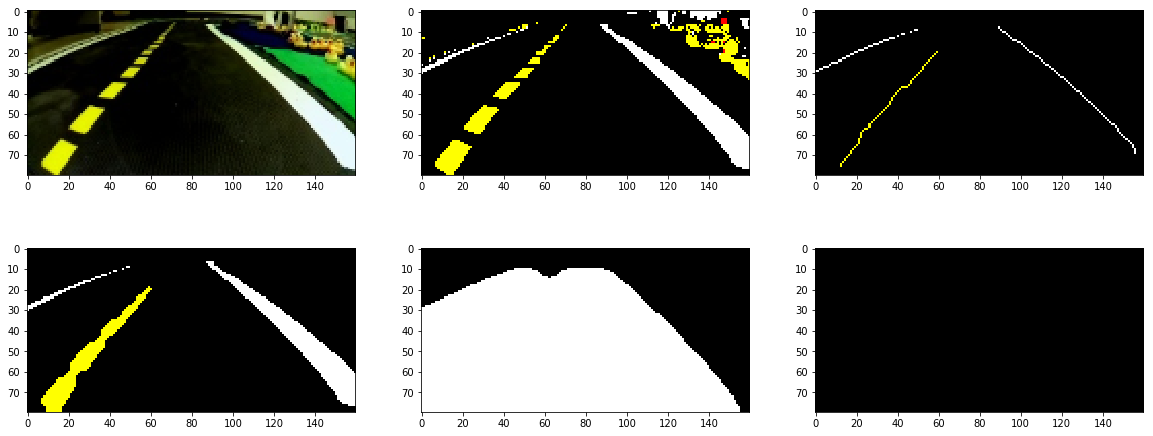

In [21]:
img = process_image(images[230], config)
skeletons, debug = detector.detect_lines(img)
raw_masks, filtered_masks, road_mask = debug

skeleton_image = skeletons_to_image(skeletons, image_size=img.shape)
raw_mask_image = detections_to_image(raw_masks)
filtered_mask_image = detections_to_image(filtered_masks)

plt.figure(figsize=(20, 8))

ax1 = plt.subplot2grid((2, 3), (0, 0))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

ax2 = plt.subplot2grid((2, 3), (0, 1))
ax2.imshow(cv2.cvtColor(raw_mask_image, cv2.COLOR_BGR2RGB))

ax3 = plt.subplot2grid((2, 3), (0, 2))
ax3.imshow(cv2.cvtColor(skeleton_image, cv2.COLOR_BGR2RGB))

ax4 = plt.subplot2grid((2, 3), (1, 0))
ax4.imshow(cv2.cvtColor(filtered_mask_image, cv2.COLOR_BGR2RGB))

ax5 = plt.subplot2grid((2, 3), (1, 1))
ax5.imshow(road_mask, cmap='gray')

ax6 = plt.subplot2grid((2, 3), (1, 2))
ax6.imshow(np.zeros_like(road_mask), cmap='gray')

plt.show()